## <p style='text-align: center;'> Analyse des emotions des Tweets 😀 😞 😡 </p> 

### <span style="color: Navy"> 1.Intorduction </span> 

La détection des émotions à partir de texte est un défi majeur en traitement du langage naturel (NLP) en raison du manque de jeux de données étiquetés et de leur complexité multi-classes. Les humains éprouvent une large gamme d'émotions qu'il est difficile de représenter avec suffisamment de données pour chaque émotion, entraînant un déséquilibre des classes. Ce jeu de données de classification des émotions a été compilé pour soutenir la recherche dans le domaine du NLP et de l'analyse des émotions. Il comprend une grande variété de textes étiquetés avec les émotions qu'ils véhiculent, allant de la joie à la colère et la tristesse. L'objectif est de construire un modèle efficace pour détecter les émotions à partir du texte en utilisant RNN.
lien de dataset: https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text

### <span style="color: Navy"> 2.Importation des bibliotheques </span> 

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier



### <span style="color: Navy"> 3.Nettoyage des données : </span> 

In [5]:
df=pd.read_csv('datasets/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df.duplicated().sum()

686

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(416123, 2)

In [11]:
Emotion ={0:'Sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}
df['Emotion'] = df['label'].map(Emotion)
df.head()


,text,label,Emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,Sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,Sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [12]:
# Text preprocessing avec NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <span style="color: Navy"> 4.Normalisation des données</span>

In [13]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()] # ne garder que les mots alphabétiques
    tokens = [word.lower() for word in tokens] # mettre en minuscule
    tokens = [word for word in tokens if not word in stop_words] # suppression des mots vides
    return ' '.join(tokens)

In [14]:
df['text'] = df['text'].apply(preprocess)

In [15]:
df.head()

,text,label,Emotion
0,feel really helpless heavy hearted,4,fear
1,ive enjoyed able slouch relax unwind frankly n...,0,Sadness
2,gave internship dmrg feeling distraught,4,fear
3,dont know feel lost,0,Sadness
4,kindergarten teacher thoroughly weary job take...,4,fear


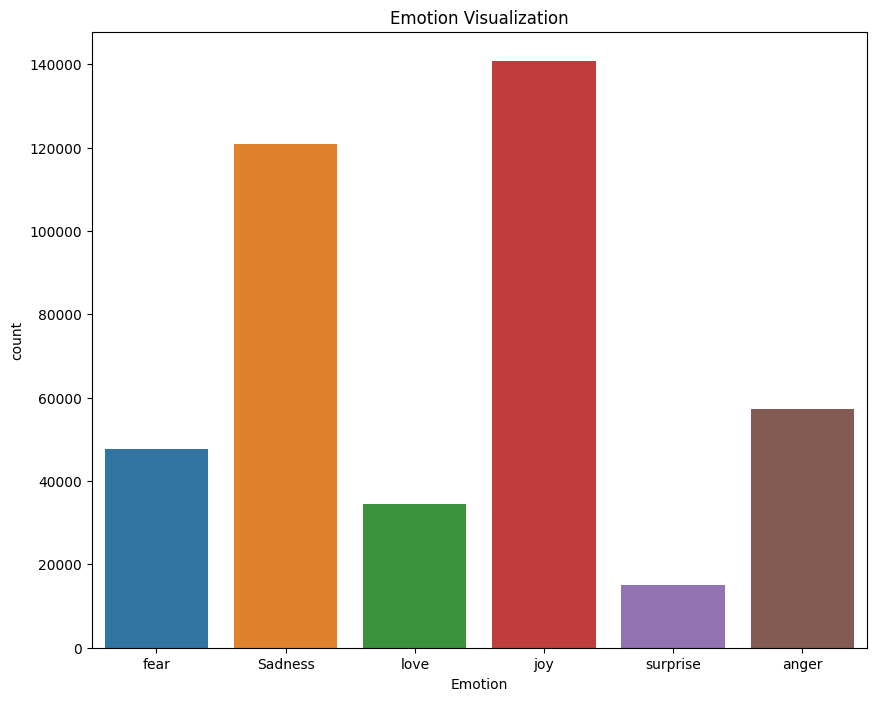

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Emotion', data=df,hue=df['Emotion'])
plt.title('Emotion Visualization')
plt.show()

### <span style="color: Navy"> 6.Séparation des données: </span> 

In [22]:
# Vectorisation des données
vectorizer = TfidfVectorizer()  # Vous pouvez ajuster max_features selon vos besoins
X = vectorizer.fit_transform(df['text'])
Y = df['label']

In [24]:

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [25]:

# Initialiser le modèle de Gradient Boosting
gb_classifier = GradientBoostingClassifier()

In [26]:


# Entraîner le modèle sur les données d'entraînement
gb_classifier.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# Faire des prédictions sur les données de test
y_pred = gb_classifier.predict(X_test)


### <span style="color: Navy"> 9.Évaluation du modèle :</span>

In [ ]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)



Accuracy: 0.3665605286872935
Precision: 0.24532433347413635
F1 Score: 0.21857914851309043


C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### <span style="color: Navy"> 10.Visualisation :</span>

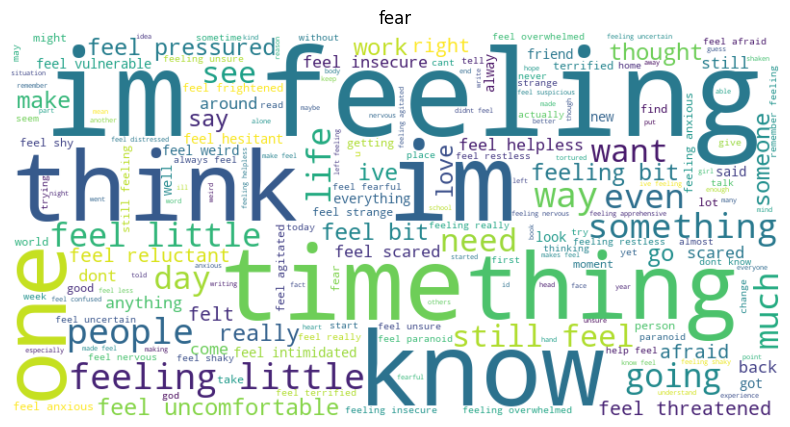

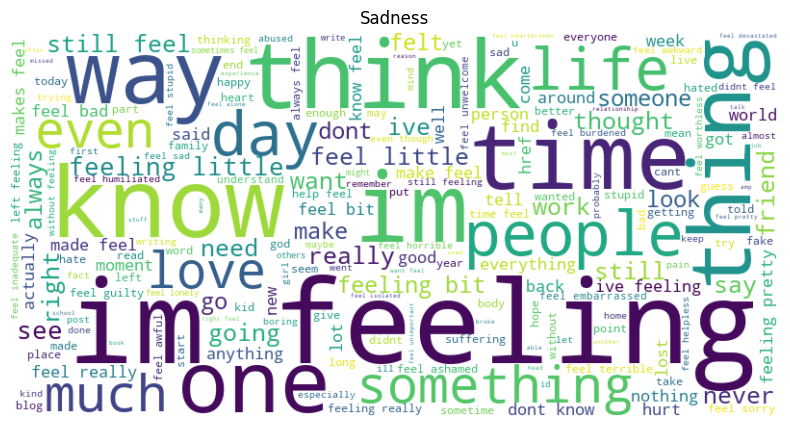

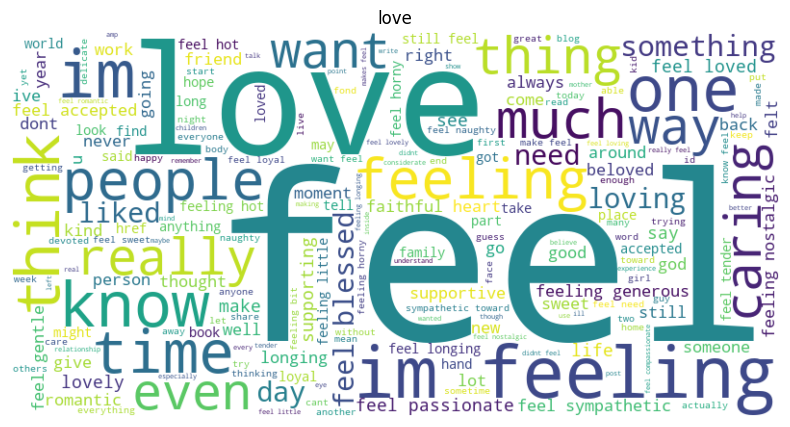

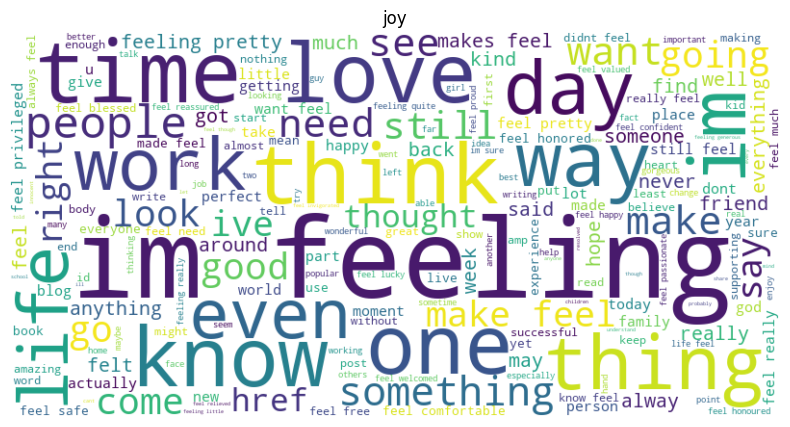

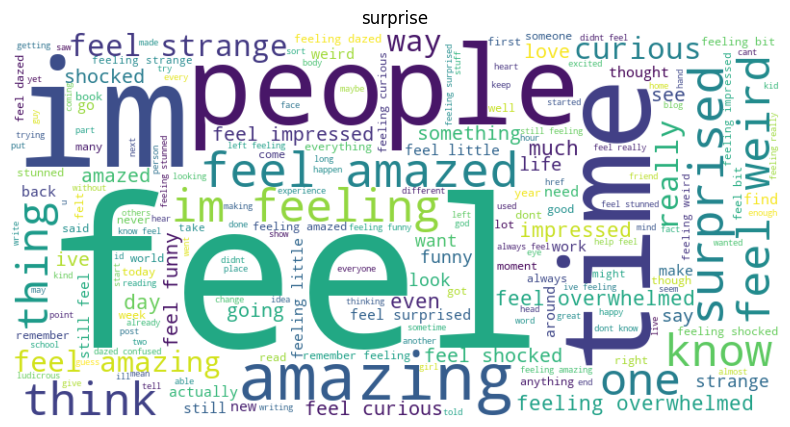

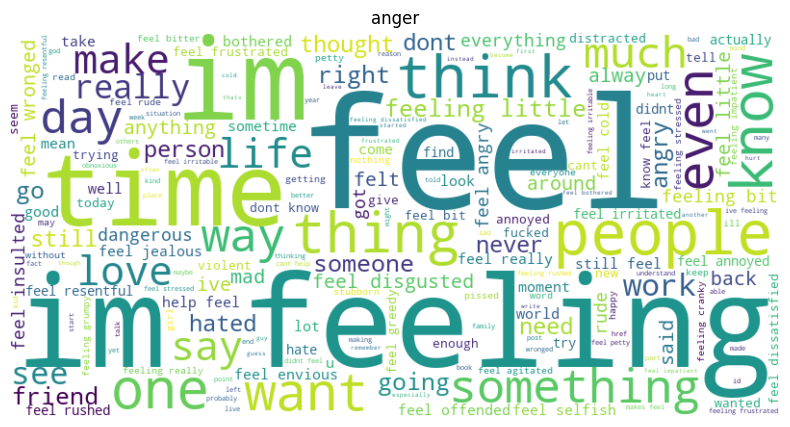

In [ ]:

# Créer un dictionnaire pour stocker les textes associés à chaque émotion
emotion_texts = {}

# Filtrer les textes en fonction de l'émotion et les stocker dans le dictionnaire
for emotion in df['Emotion'].unique():
    emotion_texts[emotion] = " ".join(df[df['Emotion'] == emotion]['text'])

# Générer un nuage de mots pour chaque émotion
for emotion, text in emotion_texts.items():
    # Créer un objet WordCloud avec les paramètres appropriés
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(emotion)
    plt.axis('off')
    plt.show()


In [ ]:

# Calculer la matrice de confusion
#conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label.classes_, yticklabels=label.classes_)
#plt.xlabel('Émotions Prédites')
#plt.ylabel('Émotions Réelles')
#plt.title('Matrice de Confusion')
#plt.show()


### <span style="color: Navy"> 11.Prediction des nouveaux textes:</span>

In [ ]:
def predict_emotion(new_text, pipeline):
    # Prétraitement du nouveau texte
    preprocessed_text = preprocess(new_text)
    
    # Prédiction de l'émotion (label numérique)
    predicted_label = pipeline.predict([preprocessed_text])[0]
    
    # Récupération du nom de la classe associée à la prédiction
    predicted_class = Emotion[predicted_label]
    
    return predicted_label, predicted_class



In [ ]:
text_to_predict = "After failing multiple times in my attempts to find a job, I feel depressed and discouraged."
# Prédire l'émotion du texte
predicted_emotion = predict_emotion(text_to_predict, model)
print("Predicted emotion:", predicted_emotion)


NameError: name 'model' is not defined

In [ ]:
# Texte à prédire
text_to_predict = "I'm feeling happy today!"
# Prédire l'émotion du texte
predicted_emotion = predict_emotion(text_to_predict, model)
print("Predicted emotion:", predicted_emotion)

Predicted emotion: (1, 'joy')


In [ ]:
# Texte à prédire
text_to_predict = "Surprised party!"
# Prédire l'émotion du texte
predicted_emotion = predict_emotion(text_to_predict, model)
print("Predicted emotion:", predicted_emotion)

Predicted emotion: (5, 'surprise')
